In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [54]:
df = pd.read_csv("../flare_tables/20200218_vetted_flares.csv",
                names=['ampl_rec','cstart','cstop','ed_rec','ed_rec_err',
                    'istart', 'istop','total_n_valid_data_points', 
                    'tstart', 'tstop',  'dur', 'ed_ratio','ed_ratio_count',
            'amplitude_ratio','amplitude_ratio_count','duration_ratio','duration_ratio_count',
            'amplitude_corr','duration_corr','ed_corr','recovery_probability','recovery_probability_count',
            'ed_ratio_std','amplitude_ratio_std','duration_ratio_std','recovery_probability_std',
            'ed_corr_err','amplitude_corr_err','duration_corr_err',])
              
                
df.head()
df.shape

(221, 29)

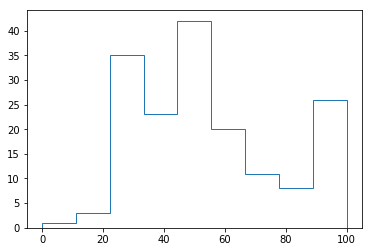

In [35]:
plt.hist(df.recovery_probability_count, bins=np.linspace(0,100,10), histtype="step");

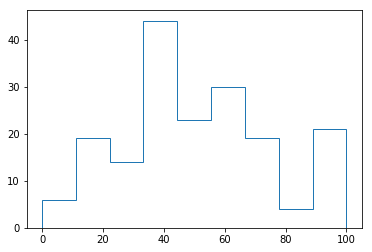

In [36]:
plt.hist(df.ed_ratio_count, bins=np.linspace(0,100,10), histtype="step");

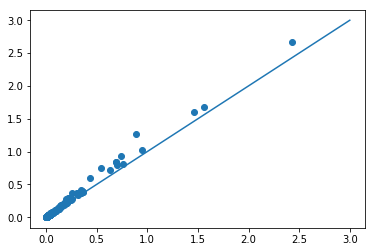

In [37]:
plt.scatter(df.ampl_rec, df.amplitude_corr)
plt.plot([0,3],[0,3])

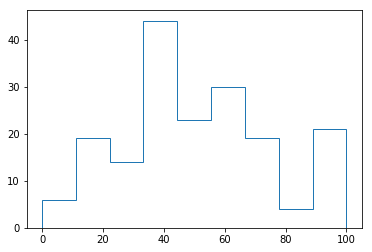

In [38]:
plt.hist(df.amplitude_ratio_count, bins=np.linspace(0,100,10), histtype="step");

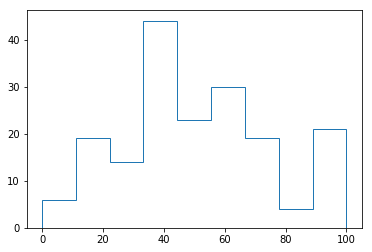

In [39]:
plt.hist(df.duration_ratio_count, bins=np.linspace(0,100,10), histtype="step");

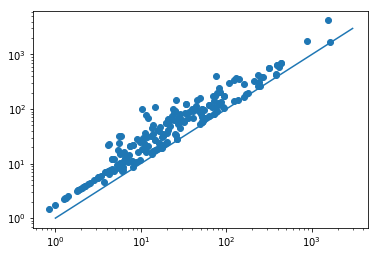

In [40]:
plt.scatter(df.ed_rec, df.ed_corr)
plt.plot([1,3e3],[1,3e3])
plt.yscale("log")
plt.xscale("log")

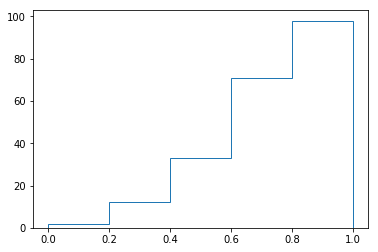

In [41]:
plt.hist(df.recovery_probability, bins=np.linspace(0,1,6), histtype="step");

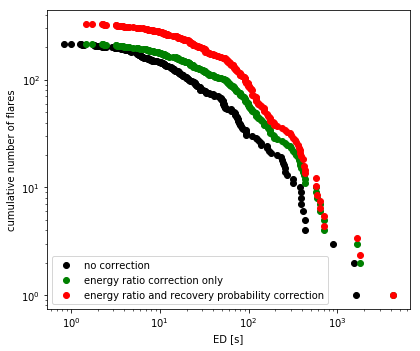

In [42]:
df = df[~np.isnan(df.recovery_probability)]
df = df.sort_values(by="ed_corr", ascending=False)
df = df[~df.ed_corr.isnull() & np.isfinite(df.ed_corr)]
df["encorrprob"] = 1./df.recovery_probability.values

plt.figure(figsize=(6.5,5.5))
plt.scatter(df.ed_rec.sort_values(ascending=False), np.cumsum(np.ones_like(df.ed_rec.values)), c="k", label="no correction")
plt.scatter(df.ed_corr.sort_values(ascending=False), np.cumsum(np.ones_like(df.ed_corr.values)), c="g", label="energy ratio correction only")
plt.scatter(df.ed_corr, np.cumsum(1./df.recovery_probability.values), c="r", label="energy ratio and recovery probability correction")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("ED [s]")#"flare energy in TESS band [erg]")
plt.ylabel("cumulative number of flares")
plt.legend()
#plt.savefig("plots/{}_FFD_two_step_correction.png".format(today), dpi=300)

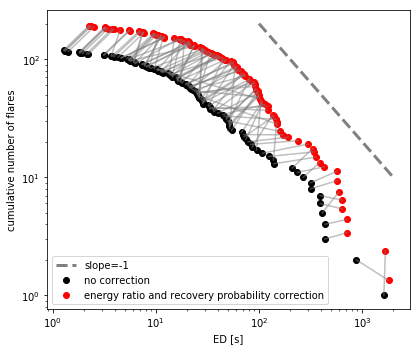

In [55]:
df = df[df.recovery_probability > .2]
df = df[df.recovery_probability_count > 40]
df = df[df.ed_ratio_count > 40]

df = df.sort_values(by="ed_rec", ascending=False)
df['probnocorrcum'] = np.cumsum(np.ones_like(df.ed_rec.values))
df['sortededrec'] =df.ed_rec.sort_values(ascending=False)
df = df.sort_values(by="ed_corr", ascending=False)
df = df[(~df.ed_corr.isnull()) & (np.isfinite(df.ed_corr)) & (df.recovery_probability >0.10) ]
df["ed_corrprob"] = 1/df.recovery_probability.values
df["ed_corrprob_err"] = df.recovery_probability_std / df.recovery_probability**2
df["ed_corrprobcum"] = np.cumsum(df.ed_corrprob.values)


plt.figure(figsize=(6.5,5.5))
for l, row in df.iterrows():
    plt.plot([row.sortededrec, row.ed_corr], [row.probnocorrcum, row.ed_corrprobcum],c="grey",alpha=.5)
plt.scatter(df["sortededrec"], df["probnocorrcum"], label="no correction", c="k")#, condition {}".format(label))
plt.scatter(df.ed_corr, df["ed_corrprobcum"], label="energy ratio and recovery probability correction", c="r")#, condition {}".format(label))
plt.plot([100, 2000],[200, 10], label="slope=-1", linestyle="dashed", c="grey", linewidth=3)
plt.xscale('log')
plt.yscale('log')
#plt.ylim(.8,250)
#plt.xlim(5,4000)
plt.xlabel("ED [s]")#"flare energy in TESS band [erg]")
plt.ylabel("cumulative number of flares")
plt.legend()
#plt.savefig("plots/{}_FFD_flare_correspondence_correction.png".format(today), dpi=300)

In [56]:
df.shape

(119, 34)